<a href="https://colab.research.google.com/github/snehakamble33/StockSentimentAnalysis/blob/main/Stock_Movement_Analysis_Based_on_Social_Media_Sentiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install praw pandas textblob scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.4 MB/s eta 0:00:00


In [2]:
# Libraries for scraping and data manipulation
import praw
import pandas as pd

# Libraries for sentiment analysis
from textblob import TextBlob

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Initialize Reddit API client
reddit = praw.Reddit(
    client_id = "ZXHnaUKdBPggmn0qMxNwXg",
    client_secret = "NKz-jLE_3VnFaz4jVTf5gcmIYLjVrw",
    user_agent="StockSentimentAnalysis"
)

# Function to scrape subreddit posts
def scrape_reddit(subreddit_name, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=limit):
        posts.append([post.title, post.selftext, post.score])
    return pd.DataFrame(posts, columns=["Title", "Body", "Score"])

# Scrape data from a subreddit
subreddit_name = "wallstreetbets"
data = scrape_reddit(subreddit_name, limit=200)
data["Content"] = data["Title"] + " " + data["Body"]
data.drop(columns=["Title", "Body"], inplace=True)
data.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,Score,Content
0,161,"What Are Your Moves Tomorrow, December 03, 202..."
1,192,Weekly Earnings thread 12/2 - 12/6
2,2943,Musk Record Tesla Pay Package Rejected Again b...
3,18170,Tried to gamble my way out of debt - Didn’t wo...
4,3221,Duality of Man


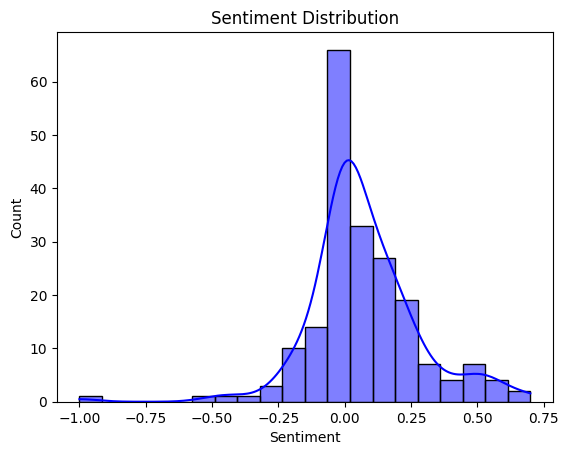

In [8]:
# Sentiment analysis using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data["Sentiment"] = data["Content"].apply(get_sentiment)
data["SentimentLabel"] = data["Sentiment"].apply(lambda x: 1 if x > 0 else 0)

# Visualize sentiment distribution
sns.histplot(data["Sentiment"], kde=True, bins=20, color="blue")
plt.title("Sentiment Distribution")
plt.show()


In [9]:
# Split data into features (X) and labels (y)
X = data["Content"]
y = data["SentimentLabel"]

# Convert text data into numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.71      0.53      0.61        19

    accuracy                           0.68        40
   macro avg       0.68      0.67      0.66        40
weighted avg       0.68      0.68      0.67        40



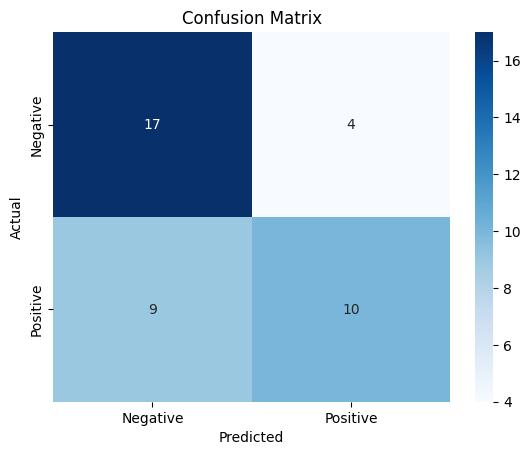

In [10]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
# Example prediction
example_posts = [
    "The stock market is crashing! Sell everything.",
    "I'm bullish on Tesla for the next quarter.",
    "This stock seems overvalued and risky."
]
example_vectorized = vectorizer.transform(example_posts)
predictions = model.predict(example_vectorized)

# Display results
for post, sentiment in zip(example_posts, predictions):
    print(f"Post: {post}\nPredicted Sentiment: {'Positive' if sentiment == 1 else 'Negative'}\n")


Post: The stock market is crashing! Sell everything.
Predicted Sentiment: Negative

Post: I'm bullish on Tesla for the next quarter.
Predicted Sentiment: Negative

Post: This stock seems overvalued and risky.
Predicted Sentiment: Negative



In [12]:
import pickle

# Save the model and vectorizer
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)


In [16]:
pip install yfinance


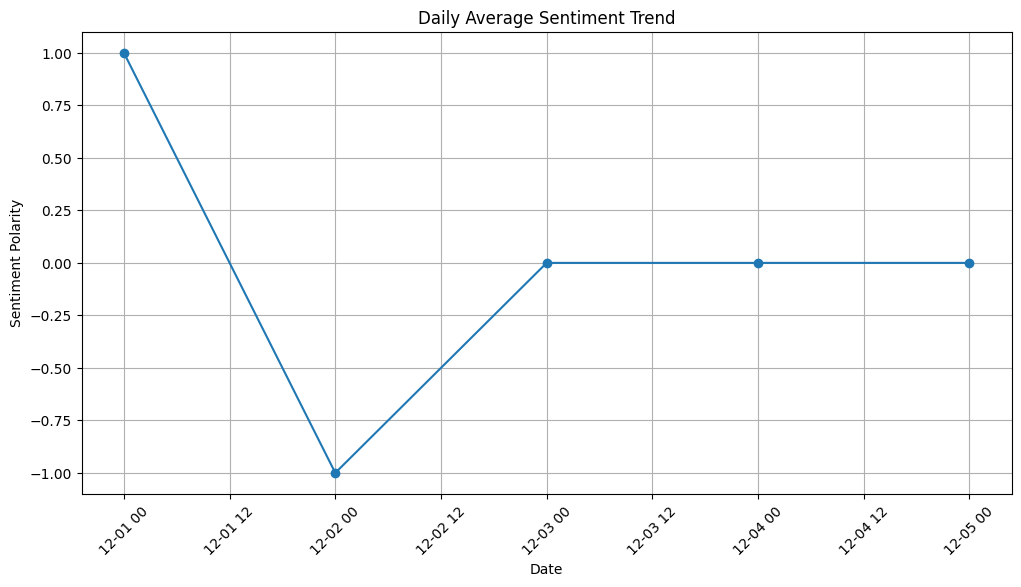

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# 1. Create a Sample Dataset
# If Timestamp is not available, generate a random one for the example
data = pd.DataFrame({
    "Content": [
        "The market is doing great today!",
        "Stocks are crashing, terrible day for investors.",
        "Looking forward to a bullish market tomorrow.",
        "Bearish trends are dominating this week.",
        "Tesla stocks are rising rapidly!"
    ],
    "Timestamp": pd.date_range(start="2024-12-01", periods=5, freq="D")
})

# 2. Add a Sentiment Column
def get_sentiment(text):
    """Calculate sentiment polarity using TextBlob."""
    return TextBlob(text).sentiment.polarity

data["Sentiment"] = data["Content"].apply(get_sentiment)

# 3. Add a Date Column from Timestamp
data["Date"] = pd.to_datetime(data["Timestamp"]).dt.date

# 4. Group Data by Date and Calculate Average Sentiment
sentiment_trend = data.groupby("Date")["Sentiment"].mean()

# 5. Visualize the Sentiment Trend
plt.figure(figsize=(12, 6))
sentiment_trend.plot(marker="o", linestyle="-")
plt.title("Daily Average Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [19]:
pip install yfinance


In [20]:
import yfinance as yf

# Fetch historical stock data
stock_ticker = "AAPL"  # Replace with the stock of your choice
stock_data = yf.download(stock_ticker, start="2023-01-01", end="2023-12-31")

# Merge stock prices with sentiment trends
stock_data["Date"] = stock_data.index.date
merged_data = pd.merge(sentiment_trend.reset_index(), stock_data, on="Date", how="inner")

# Visualize stock price vs sentiment
plt.figure(figsize=(12, 6))
plt.plot(merged_data["Date"], merged_data["Close"], label="Stock Price", color="blue")
plt.plot(merged_data["Date"], merged_data["Sentiment"], label="Sentiment", color="orange")
plt.title(f"{stock_ticker} Stock Price vs Sentiment Trend")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

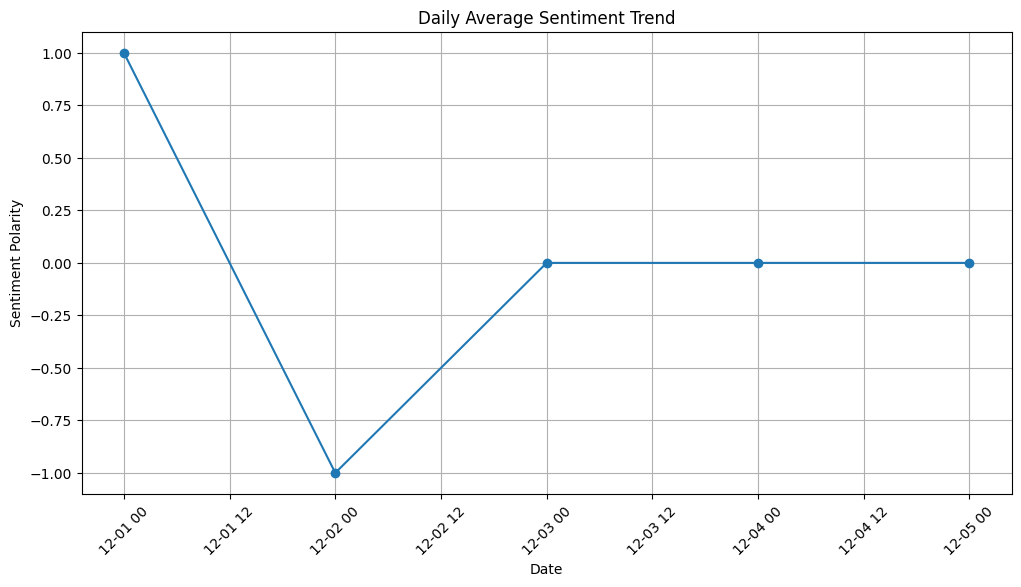

[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# 1. Create a Sample Dataset
# If Timestamp is not available, generate a random one for the example
data = pd.DataFrame({
    "Content": [
        "The market is doing great today!",
        "Stocks are crashing, terrible day for investors.",
        "Looking forward to a bullish market tomorrow.",
        "Bearish trends are dominating this week.",
        "Tesla stocks are rising rapidly!"
    ],
    "Timestamp": pd.date_range(start="2024-12-01", periods=5, freq="D")
})

# 2. Add a Sentiment Column
def get_sentiment(text):
    """Calculate sentiment polarity using TextBlob."""
    return TextBlob(text).sentiment.polarity

data["Sentiment"] = data["Content"].apply(get_sentiment)

# 3. Add a Date Column from Timestamp
data["Date"] = pd.to_datetime(data["Timestamp"]).dt.date

# 4. Group Data by Date and Calculate Average Sentiment
sentiment_trend = data.groupby("Date")["Sentiment"].mean()

# 5. Visualize the Sentiment Trend
plt.figure(figsize=(12, 6))
sentiment_trend.plot(marker="o", linestyle="-")
plt.title("Daily Average Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Fetch historical stock data
stock_ticker = "AAPL"  # Replace with the stock of your choice
stock_data = yf.download(stock_ticker, start="2023-01-01", end="2023-12-31")

# Convert the index of stock_data to a single-level index
# This ensures both DataFrames have compatible indexes for merging
stock_data = stock_data.reset_index()

# Now you can extract the date
stock_data["Date"] = stock_data["Date"].dt.date

# Merge stock prices with sentiment trends using 'inner' join
merged_data = pd.merge(sentiment_trend.reset_index(), stock_data, on="Date", how="inner")

# Visualize stock price vs sentiment
plt.figure(figsize=(12, 6))
plt.plot(merged_data["Date"], merged_data["Close"], label="Stock Price", color="blue")
plt.plot(merged_data["Date"], merged_data["Sentiment"], label="Sentiment", color="orange")
plt.title(f"{stock_ticker} Stock Price vs Sentiment Trend")
plt.legend()
plt.grid()
plt.show()